In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [3]:
base = pd.read_csv('../../Data/BaseData.csv')

In [4]:
Ridge = Ridge()

In [5]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [6]:
len(y)

2580

In [7]:
X.shape

(2580, 298)

In [8]:
X.shape[1]

298

In [9]:
Scores = []
AdjR2 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    Ridge.fit(X_train, y_train)
    pred = Ridge.predict(X_test)
    Score = r2_score(y_test, pred)
    Scores.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.01242e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.99932e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.18979e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.65671e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAl

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.396e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.9242e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.80881e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.35628e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWa

In [10]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [11]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [12]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])

In [13]:
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])

In [14]:
R2vAR2 = pd.concat([R2, AR2], axis=1)

In [15]:
R2vAR2

,R_Squared,Adjusted_R2
0,0.933996,0.925373
1,0.915706,0.904693
2,0.921634,0.911396
3,0.888841,0.874319
4,0.860931,0.842762
...,...,...
95,0.886670,0.871865
96,0.913309,0.901983
97,0.887061,0.872306
98,0.888373,0.873789


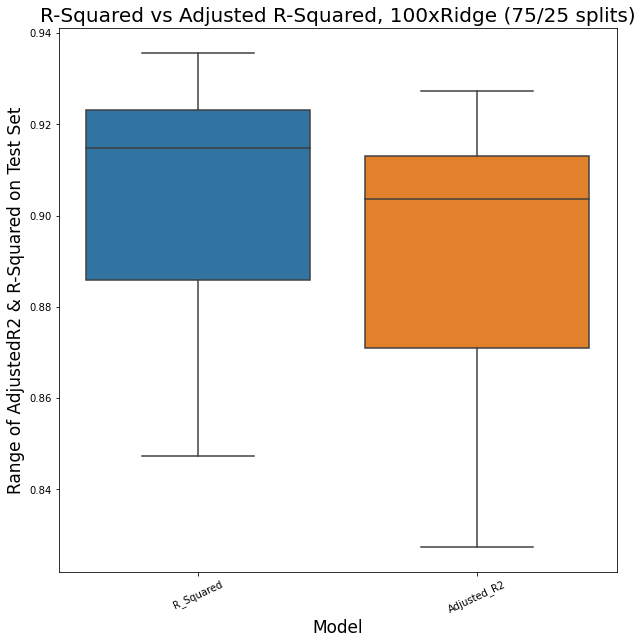

In [16]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xRidge (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [17]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [18]:
#df = pd.DataFrame(Positive, columns=['Ridge'])
R2vAR2.to_csv('Ridge_R2vAR2.csv', index=False)

In [19]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [20]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.933996,0.925373,0.008623
1,0.915706,0.904693,0.011013
2,0.921634,0.911396,0.010238
3,0.888841,0.874319,0.014522
4,0.860931,0.842762,0.018169
...,...,...,...
95,0.886670,0.871865,0.014806
96,0.913309,0.901983,0.011326
97,0.887061,0.872306,0.014755
98,0.888373,0.873789,0.014583


In [21]:
R2vAR2.Difference.mean()

0.012444568785942897

In [22]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.904745,0.892300,0.012445
std,0.023733,0.026833,0.003101
min,0.847334,0.827389,0.008400
25%,0.885803,0.870884,0.010048
50%,0.914798,0.903667,0.011131
75%,0.923089,0.913041,0.014919
max,0.935705,0.927305,0.019945
